<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Understanding the content of the competition



1.   Home Credit is an international consumer finance provider which strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience.
2.   The expectation of this competition is to predict their clientS repayment abilities by using a variety of alternative data--including telco and transactional information.
3.   By predicting this, they ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful



In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import chardet
from plotly import __version__
from sklearn.impute import SimpleImputer
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import LabelEncoder

cf.go_offline()

init_notebook_mode(connected=False)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Application train data
app_train = pd.read_csv("application_train.csv")
app_train.shape

(307511, 122)

In [ ]:
# Checking the csv file encoding
with open("HomeCredit_columns_description.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

# Loading the columns descriptions
col_desc = pd.read_csv("HomeCredit_columns_description.csv", index_col=0, encoding=encoding)

# Set the option to display full content without truncation
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Display the dataframe in a more interactive and dense format
%load_ext google.colab.data_table

col_desc.query("`Table` == 'application_{train|test}.csv'")

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
# Disable the data_table extension so it doesn't affect other cells
%unload_ext google.colab.data_table

---

[Problem 2] Understanding the overview of data

In [ ]:
print('Training data shape: ', app_train.shape, '\n')
app_train.head()

Training data shape:  (307511, 122) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the `TARGET` (the label we want to predict).

**Check for missing values**

Next we can look at the number and percentage of missing values in each column.

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(app_train)
print("\n")
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.




,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


<Axes: >

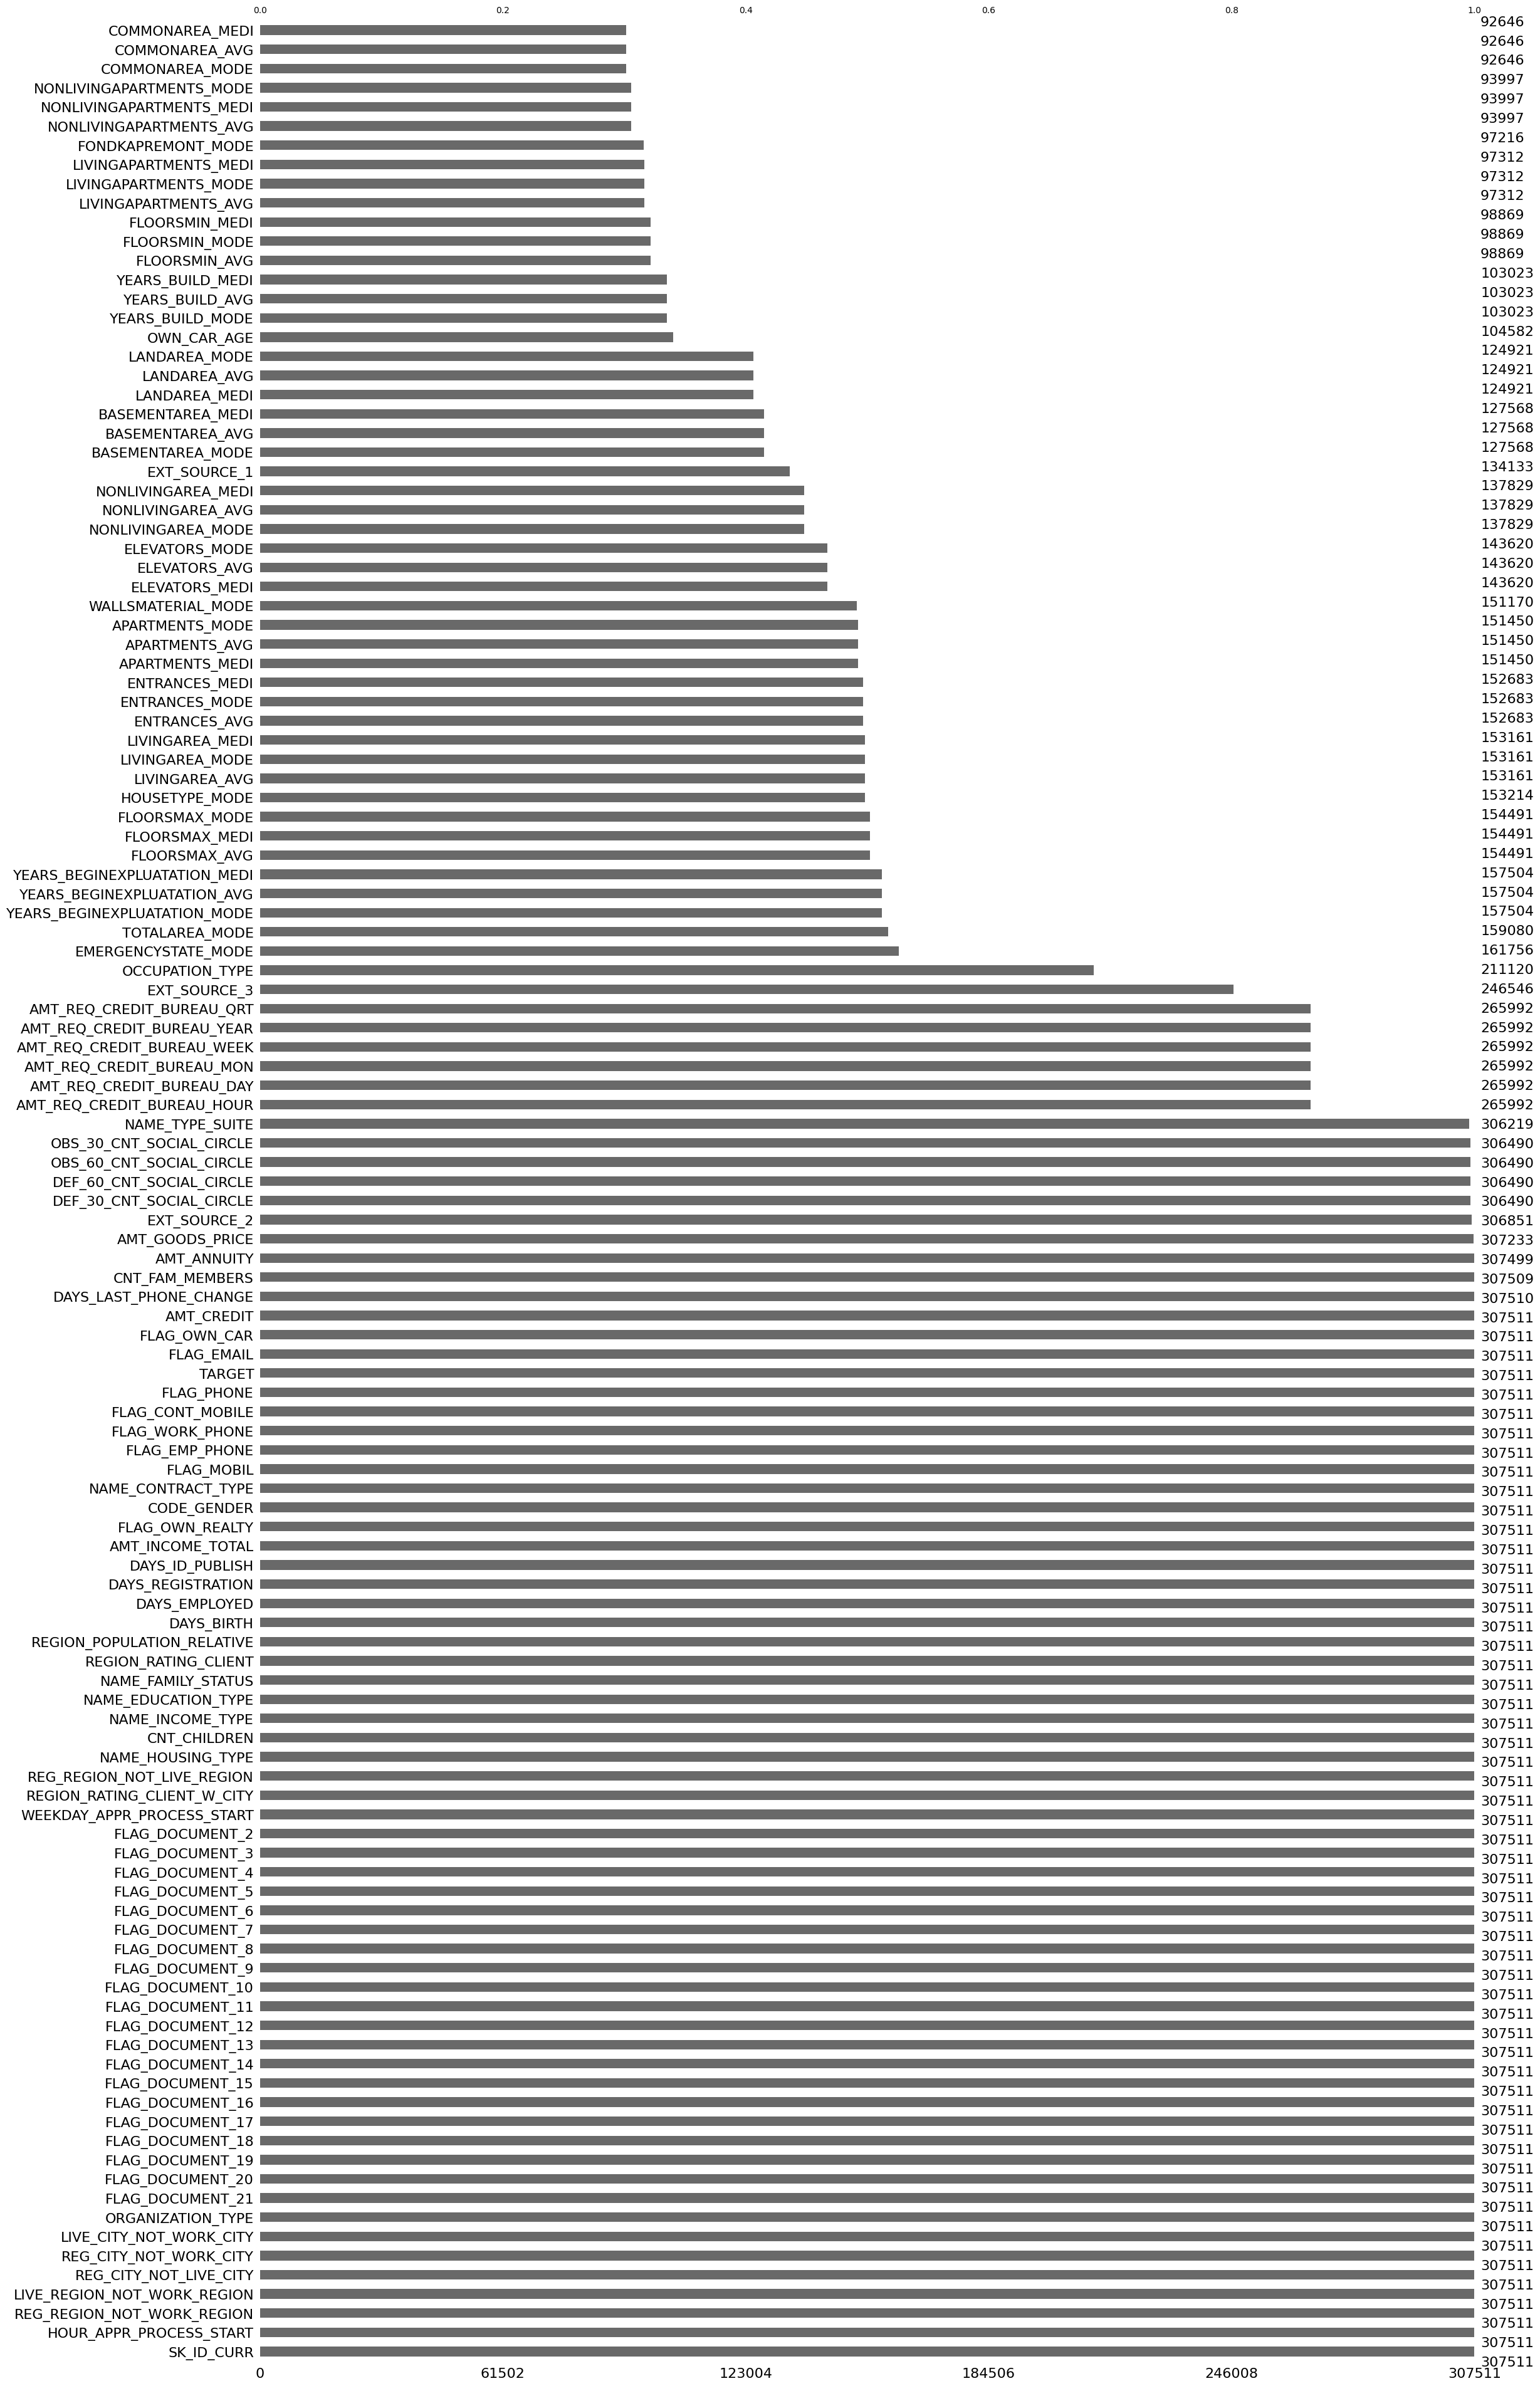

In [ ]:
# Visualizing missing values
msno.bar(app_train[app_train.isnull().sum().sort_values().index])

**Draw a graph showing the percentage of classes**

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [ ]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
temp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
configure_plotly_browser_state()
df.iplot(kind='pie',labels='labels',values='values', title='Loan Repayed or not')

From this information, we see this is an imbalanced class problem. There are far more loans that were repaid (**91.9%**) on time than loans that were not repaid (**8.1%**).

---

[Problem 3] Defining issues

Based on the overview of the data provided on the current page, here are multiple issues/questions that can be set:

- What types of data are features about?
- How can we address the missing values in the dataset to ensure the integrity of the analysis?
- How to handle non-numeric datas?
- What are correlations between the features and the target?
- What strategies can we employ to handle the imbalanced class distribution in the `TARGET` variable?
- Which features are most predictive of a client’s repayment ability and how can we select them?
- Given the class imbalance, what evaluation metrics should we use to assess the performance of our predictive models?
- Is there any anomalies within the data?
- What types of loans are granted to customers?
- What is the main reason why customers borrow money?
- What are income sources of applicant's who applied for loan?
- What are the family Status of applicant's who applied for loan?

---

[Problem 4] Data exploration

**What types of data are features about?**

Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables (which can be either discrete or continuous). `object` columns contain strings and are categorical features. .

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Let's now look at the number of unique entries in each of the `object` (categorical) columns.

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

**How can we address the missing values in the dataset to ensure the integrity of the analysis?**

To ensure the integrity of the analysis, we can first delete features that have more than 60% (this treshold is set based on missing value checking performed earlier) missing data.

Based on the assumption that these features may not provide enough information for the model due to their high rate of missingness).

In [ ]:
app_train = app_train.dropna(thresh=len(app_train) * 0.6, axis=1)

Let's check remaining missing values features types.

In [ ]:
missing_features = app_train.columns[app_train.isnull().any()].tolist()
missing_features_dtypes = app_train[missing_features].dtypes
missing_features_dtypes

AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
EXT_SOURCE_2                  float64
EXT_SOURCE_3                  float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [ ]:
app_train[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']].nunique()

NAME_TYPE_SUITE     7
OCCUPATION_TYPE    18
dtype: int64

So, it's remains both numerical and categorical values.

We can use imputation methods to address missing values. For numerical features, we might use mean or median imputation.

In [ ]:
# Create the imputer
imputer = SimpleImputer(strategy='median')

# Select the numerical columns
numerical_columns = app_train.select_dtypes(include=['int64', 'float64'])

# Perform the imputation and convert the result back to a DataFrame
imputed_data = imputer.fit_transform(numerical_columns)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns.columns)

# Replace the original numerical columns with the imputed ones
app_train[numerical_columns.columns] = imputed_df

for categorical variables, a common imputation technique is to replace missing values with the most frequent category, also known as the mode.

In [ ]:
# Create the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Select the categorical columns
categorical_columns = app_train.select_dtypes(include=['object'])

# Perform the imputation and convert the result back to a DataFrame
imputed_data = imputer.fit_transform(categorical_columns)
imputed_df = pd.DataFrame(imputed_data, columns=categorical_columns.columns)

# Replace the original categorical columns with the imputed ones
app_train[categorical_columns.columns] = imputed_df

<Axes: >

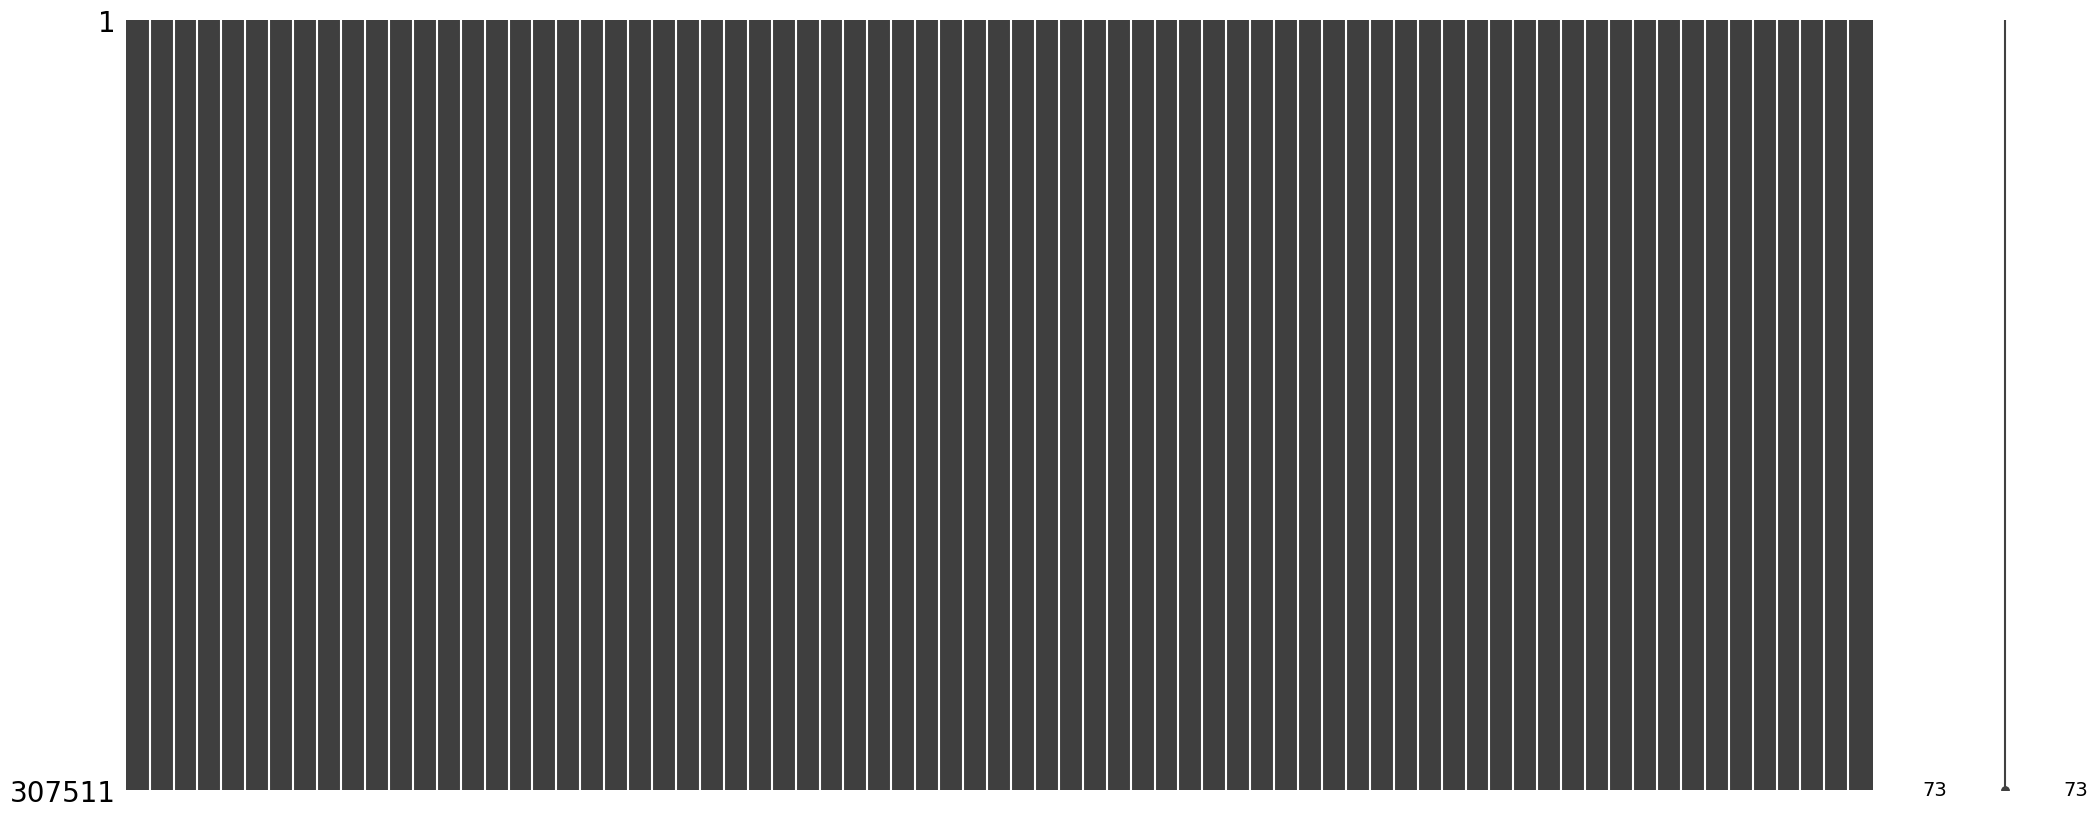

In [ ]:
msno.matrix(app_train[app_train.isnull().sum().sort_values().index])

Our data are cleaned right now.

**How to handle non-numeric datas?**

We will use `Label Encoding` for any categorical variables with only 2 categories and `One-Hot Encoding` for any categorical variables with more than 2 categories.

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 182)


**What are correlations between the features and the target?**

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032518
DAYS_REGISTRATION                                    0.041975
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the `DAYS_BIRTH` is the most positive correlation. (except for `TARGET` because the correlation of a variable with itself is always 1!).

Looking at the documentation, `DAYS_BIRTH` is the age in days of the client at the time of the loan in negative days (for whatever reason!).

The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0).

**What strategies can we employ to handle the imbalanced class distribution in the `TARGET` variable?**


To handle the imbalanced class distribution in the TARGET variable, we can use techniques like SMOTE for oversampling the minority class or undersampling the majority class. Alternatively, we can adjust the class weights in the model training process.

In [ ]:
# Code to run to oversampe the the minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(app_train.drop('TARGET', axis=1), app_train['TARGET'])

But I won't use it in this exercise.

**Which features are most predictive of a client’s repayment ability and how can we select them?**

To identify the most predictive features of a client’s repayment ability, the simplest way is to refer to the correlation of features with the target variable.

We should certainly apply some basic financial knowledge to create features that could potentially indicate whether a client will default on a loan. Drawing inspiration from [Start Here: A Gentle Introduction](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction#Domain-Knowledge-Features) and [LightGBM with Simple Features](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script?scriptVersionId=6025993) kernels on Kaggle, I’ve identified four domain knoweledge features that could be particularly informative:

CREDIT_INCOME_PERCENT: This represents the

1.   **CREDIT_INCOME_PERCENT**: This represents the ratio of the credit amount to a client’s income. It gives us an idea of how much of a client’s income is tied up in repaying the loan.
2.   **ANNUITY_INCOME_PERCENT**: This is the ratio of the loan annuity to a client’s income. It indicates the proportion of the client’s income that goes towards loan repayment each month.
3.  **CREDIT_TERM**: This is the duration of the loan repayment in months. Since the annuity is the monthly amount due, this feature tells us how long the client will be making payments.
4.  **DAYS_EMPLOYED_PERCENT**: This is the ratio of the number of days employed to the client’s age. It gives us a sense of how much of their life has been spent in employment.

In [ ]:
app_train_domain = app_train.copy()
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

Then, these features can be used for the choosen algorithm learning.

**Given the class imbalance, what evaluation metrics should we use to assess the performance of our predictive models?**

When dealing with imbalanced classes, traditional metrics like accuracy can be misleading. A model that always predicts the majority class will have high accuracy, but it’s not actually useful.

**F1-score**, **Precision-Recall AUC**, and **Balanced Accuracy** are more appropriate metrics in these cases:

- **F1-score** is the harmonic mean of precision and recall. It gives equal weight to both false positives and false negatives, making it a good measure when both are important.
- **Precision-Recall AUC** (Area Under the Curve) considers the trade-off between precision and recall. It’s useful when the positive class is rare, which is often the case in imbalanced datasets.
- **Balanced Accuracy** is the average of recall obtained on each class. It’s useful when the classes are imbalanced and we care about performance on both classes, not just the majority class.

These metrics provide a more holistic view of the model’s performance across all classes, making them more suitable for imbalanced datasets.

**Is there any anomalies within the data?**

To detect anomalies within the data, we can use techniques like Isolation Forest or DBSCAN. These methods can help identify outliers that may affect the model’s performance.

In [ ]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest()
anomalies = iso_forest.fit_predict(app_train)

The Isolation Forest model is an unsupervised learning algorithm that identifies anomalies or outliers in the data. It works by isolating observations in such a way that anomalies can be separated from normal instances more quickly, hence the name “Isolation Forest”.

In the predictions:

- A value of **-1** indicates that the corresponding data point is an **anomaly** or outlier.
- A value of **1** indicates that the corresponding data point is **not an anomaly**, i.e., it’s a normal data point.

In [ ]:
# Check if there are any anomalies
if -1 in anomalies:
    print("There are anomalies in the data.")
else:
    print("There are no anomalies in the data.")

There are anomalies in the data.


Then, it seems our dataset contains anomalies or outliers. They should be handled to improve the model performance.

Handling anomalies requires a some strategies and methods and is a time-consuming process, so we will skip it by the scope of this assignment.

**Who accompanied client when applying for the application?**

In [ ]:
temp = app_train["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
configure_plotly_browser_state()
fig = go.Figure(data=data, layout=layout)
iplot(fig)

A significant majority of clients applied without any accompaniment (**81.3%**).

Family is the second most common type of companion, though much less frequent than unaccompanied (**13.4%**).

**What types of loans are granted to customers?**

In [ ]:
temp = app_train["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },

    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }

        ]
    }
}
configure_plotly_browser_state()
iplot(fig)

Most of the loans are Cash loans which were taken by applicants. **90.5 %** loans are Cash loans.

**What are income sources of applicant's who applied for loan?**

In [ ]:
temp = app_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
configure_plotly_browser_state()
df.iplot(kind='pie',labels='labels',values='values', title='Income sources of Applicant\'s', hole = 0.5)

**51.6 %** Applicants mentioned that they are working. Then, more than half applicants mentionned are working. **23.3 %** are Commercial Associate and **18 %** are Pensioner etc.

**What are the family Status of applicant's who applied for loan?**

In [ ]:
temp = app_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
configure_plotly_browser_state()
df.iplot(kind='pie',labels='labels',values='values', title='Family Status of Applicant\'s', hole = 0.5)

The largest segment at **63.9%** indicates most applicants are married.